In [1]:
import numpy as np
from numpy.fft import fftshift, fft2, ifft2, ifftshift
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from scipy import misc
from scipy import ndimage

import cv2
import glob
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image

from utils import gauss2D, filterDFT, my_imfilter

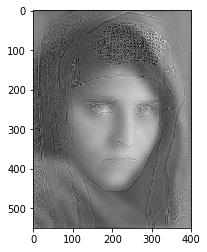

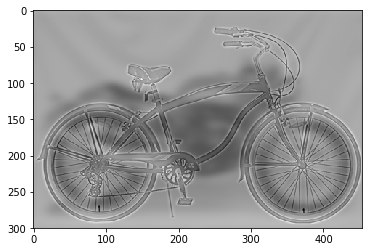

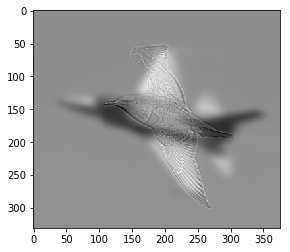

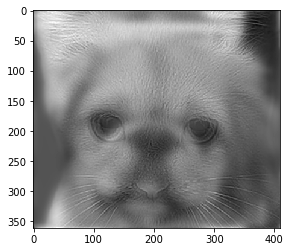

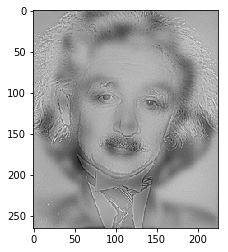

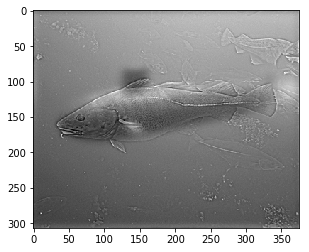

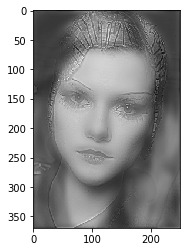

In [2]:
# Make a list of images
image1_list = ['Afghan_girl_after.jpg',
               'bicycle.bmp',
               'bird.bmp',
               'cat.bmp',
               'einstein.bmp',
               'fish.bmp',
               'makeup_after.jpg'
              ]
image2_list = ['Afghan_girl_before.jpg',
               'motorcycle.bmp',
               'plane.bmp',
               'dog.bmp',
               'marilyn.bmp',
               'submarine.bmp',
               'makeup_before.jpg'
              ]

# Read img
for fname1, fname2 in zip(image1_list, image2_list):
    img1 = ndimage.imread('./data/{}'.format(fname1),flatten=True)
    img2 = ndimage.imread('./data/{}'.format(fname2),flatten=True)
    if img1.shape!=img2.shape:
        img2 = np.pad(img2, (1,0), 'edge')
        
    # Make a gaussian filter
    gaussian_filter_high = gauss2D(img1.shape[0], img1.shape[1], sigma=35, highPass=True)
    gaussian_filter_low = gauss2D(img2.shape[0], img2.shape[1], sigma=10, highPass=False)

    # Convert to high and low frequency
    high_frequencies = filterDFT(img1, gaussian_filter_high)
    low_frequencies = filterDFT(img2, gaussian_filter_low)
    hybrid_image = low_frequencies + high_frequencies
    
    # Show and Save hybrid images
    plt.imshow(np.real(hybrid_image), cmap='gray')
    misc.imsave("./hybrid_imgs/hybrid_{}.png".format(fname1.split('.')[0]), np.real(hybrid_image))
    plt.show()